In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, rcParams, style
import seaborn as sns
from plotly import express as px,graph_objects as go
rcParams['figure.figsize'] = (10, 6)

In [ ]:
# train data
train = pd.read_csv('train.csv',
                    parse_dates = ['date'], 
                    infer_datetime_format = True, 
                    dtype = {'store_nbr' : 'category', 'family' : 'category'}, 
                    usecols = ['date', 'store_nbr', 'family', 'sales'])
train['date'] = train.date.dt.to_period('D')
train = train.set_index(['date','store_nbr','family']).sort_index()

# test data
test = pd.read_csv('test.csv', 
                   parse_dates = ['date'], 
                   infer_datetime_format = True)
test['date'] = test.date.dt.to_period('D')
test = test.set_index(['date','store_nbr','family']).sort_values('id')

# oil data
oil = pd.read_csv('oil.csv', 
                  parse_dates = ['date'], 
                  infer_datetime_format = True, 
                  index_col = 'date').to_period('D')
oil['avg_oil'] = oil['dcoilwtico'].rolling(7).mean() 

# holidays data
holiday = pd.read_csv('holidays_events.csv', 
                      parse_dates = ['date'], 
                      infer_datetime_format = True, 
                      index_col = 'date').to_period('D')
# only include national holidays
holiday = holiday[holiday.locale == 'National'] 
# remove holidays on  the same day
holiday = holiday.groupby(holiday.index).first() 

<Axes: xlabel='date', ylabel='dcoilwtico'>

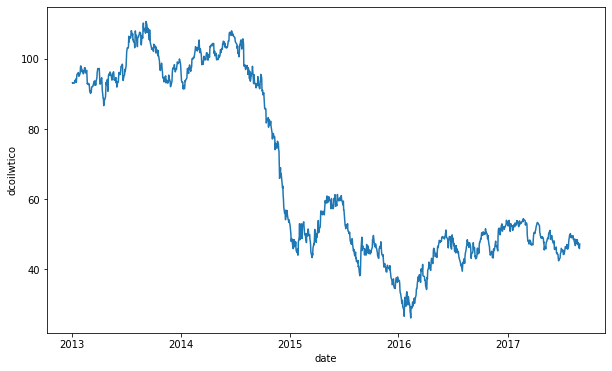

In [ ]:
sns.lineplot(data = oil.dcoilwtico.to_timestamp())

In [ ]:
holiday.type.value_counts()

Holiday       60
Event         53
Additional    37
Transfer       8
Bridge         5
Work Day       5
Name: type, dtype: int64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


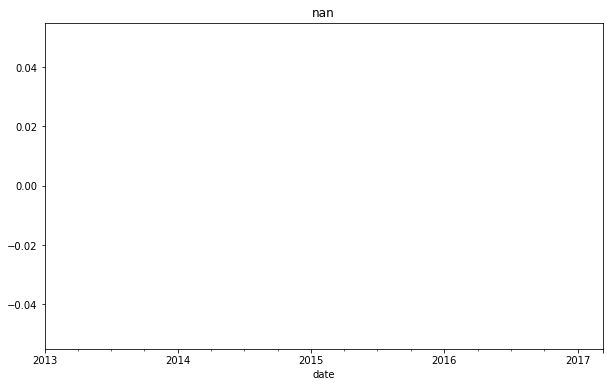

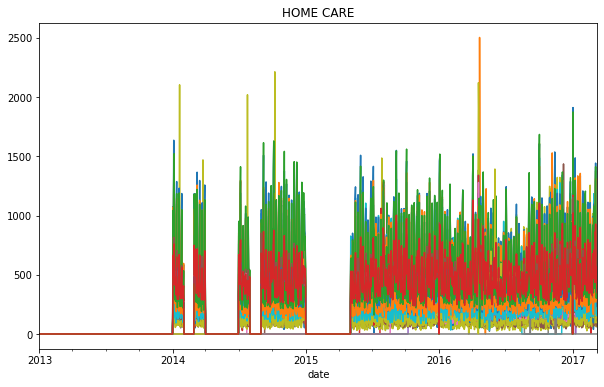

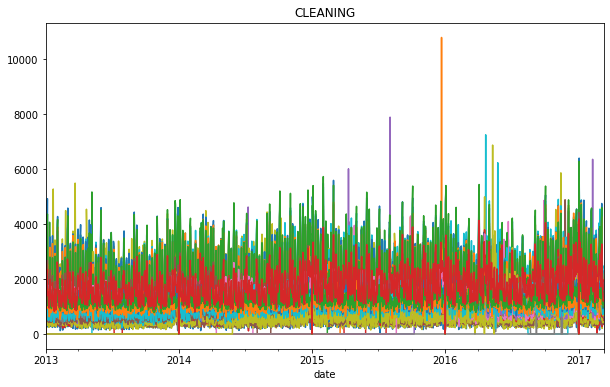

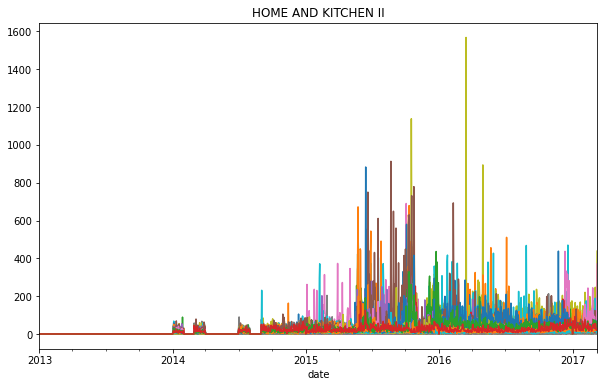

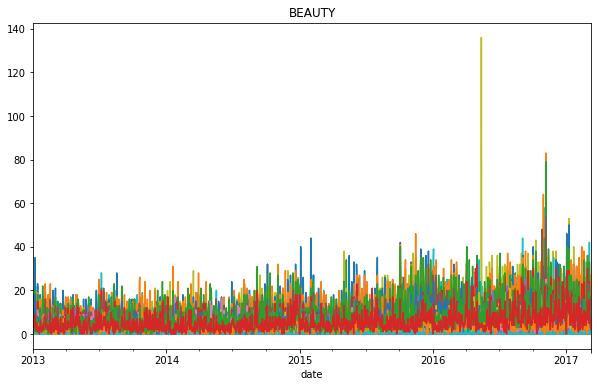

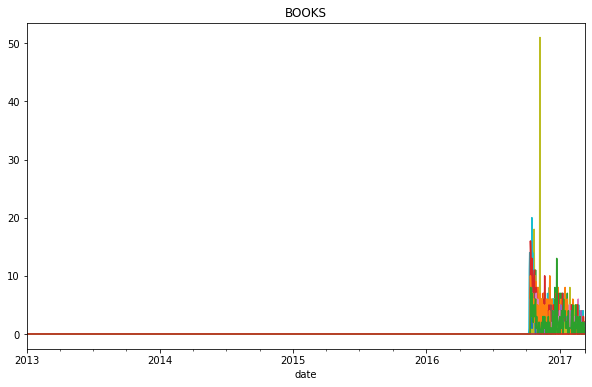

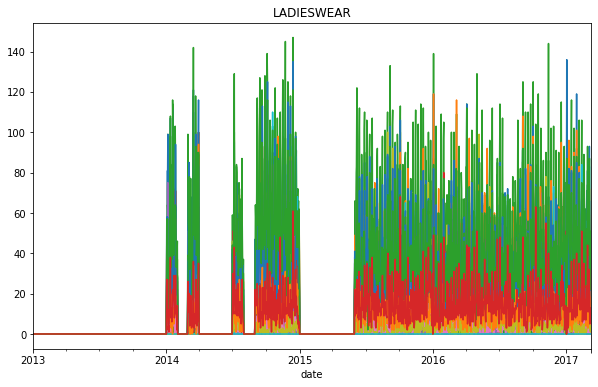

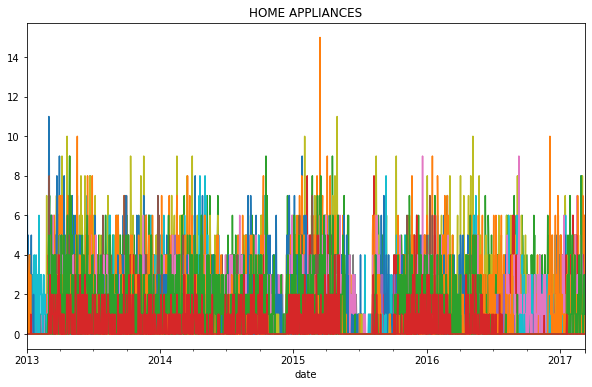

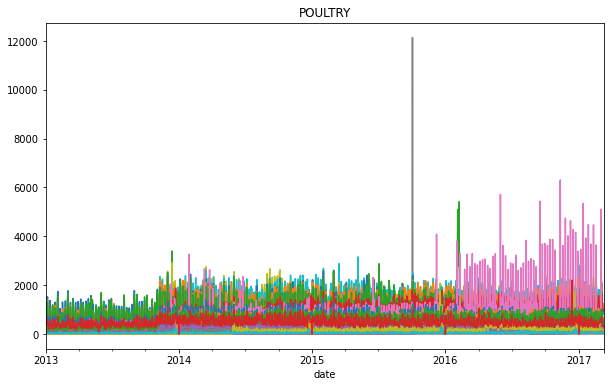

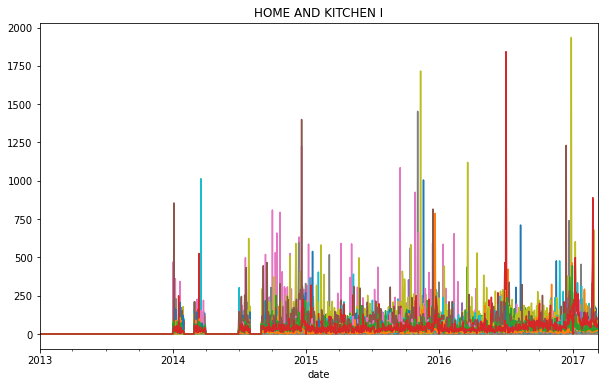

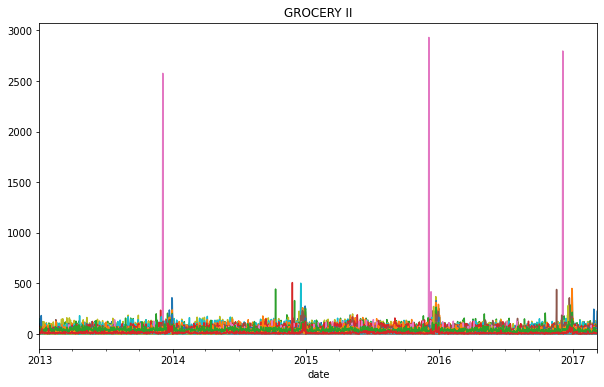

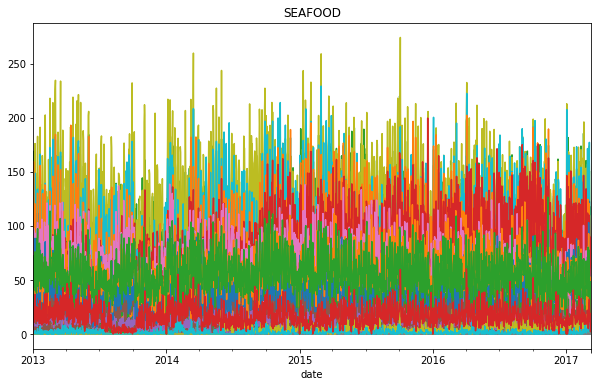

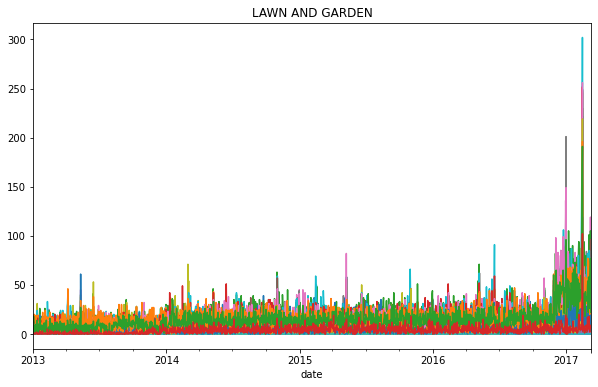

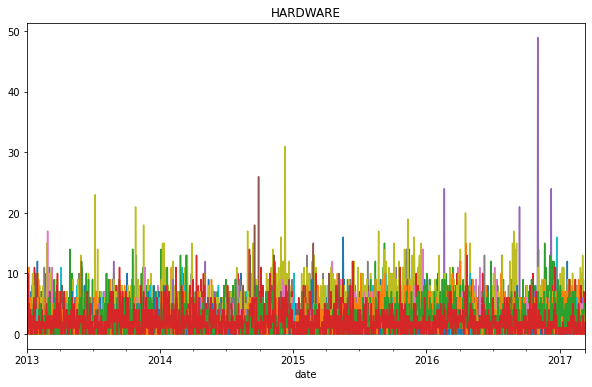

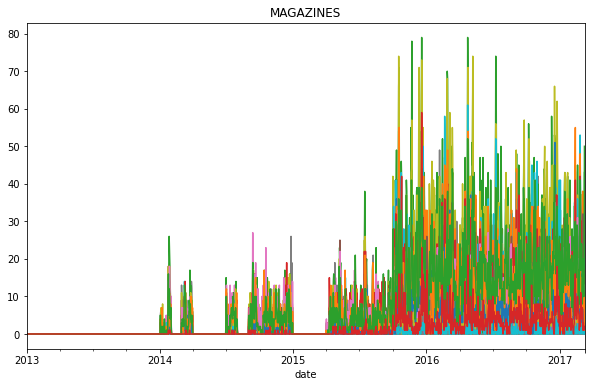

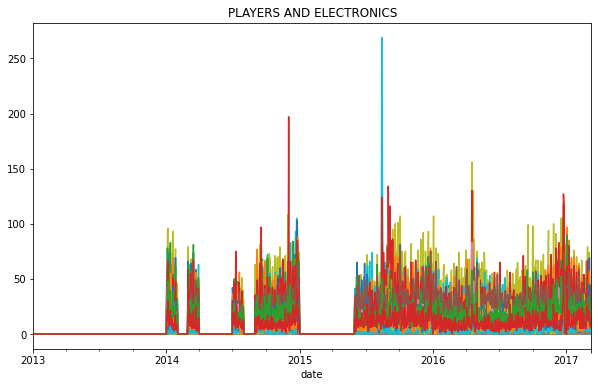

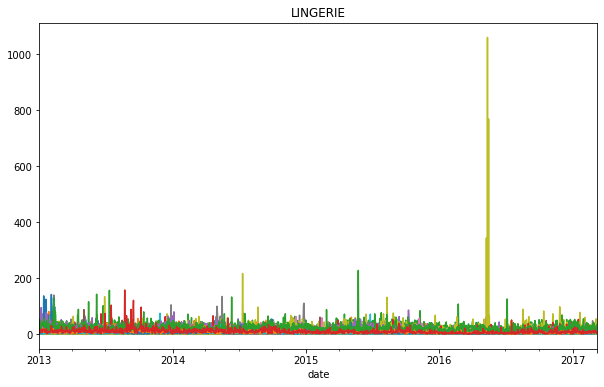

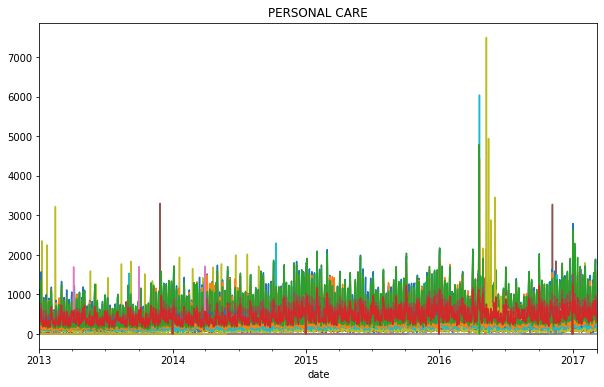

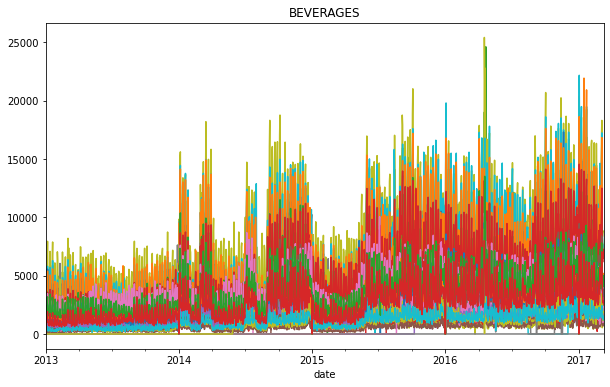

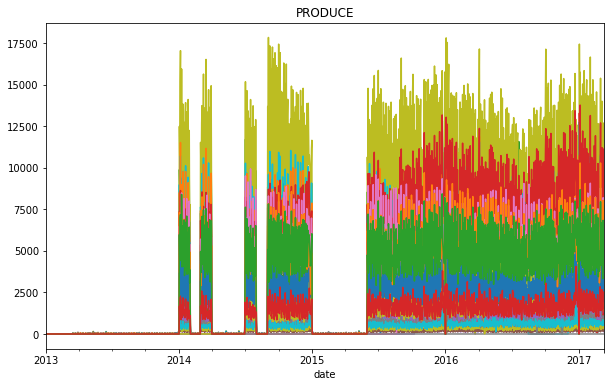

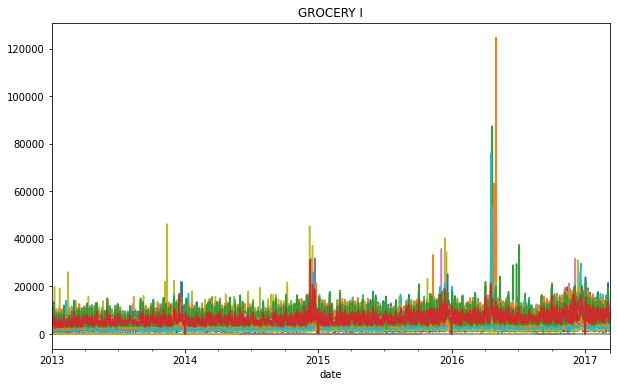

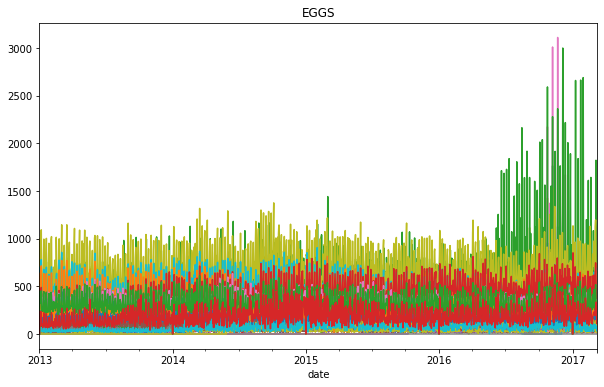

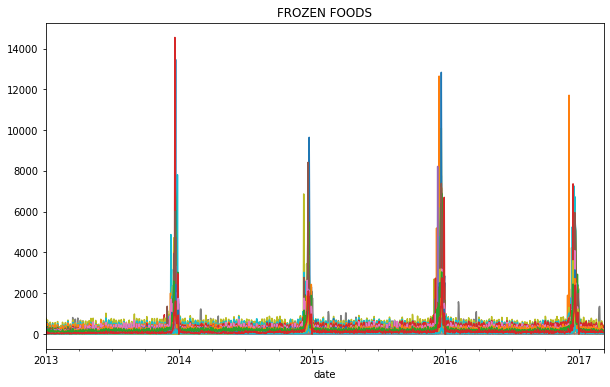

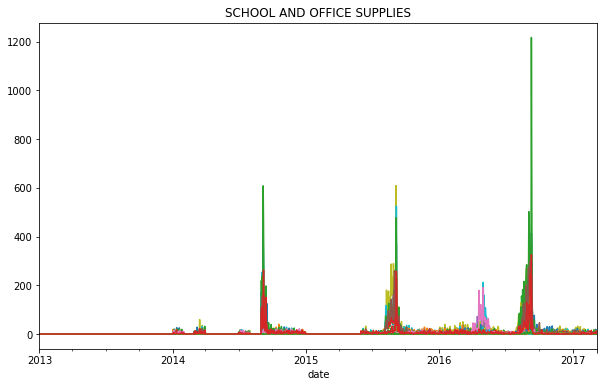

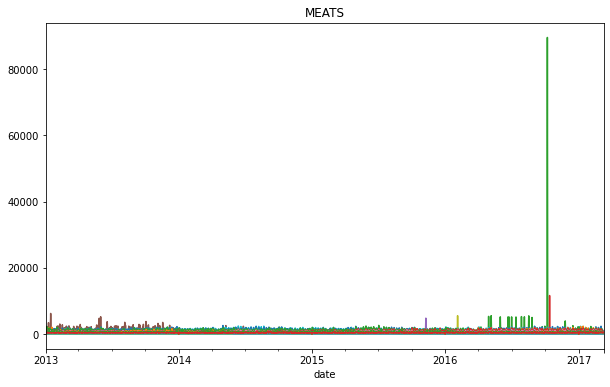

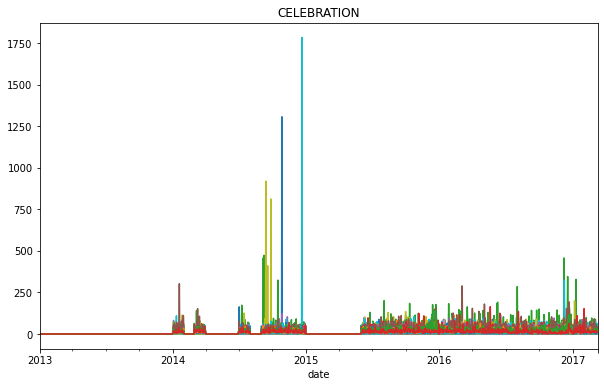

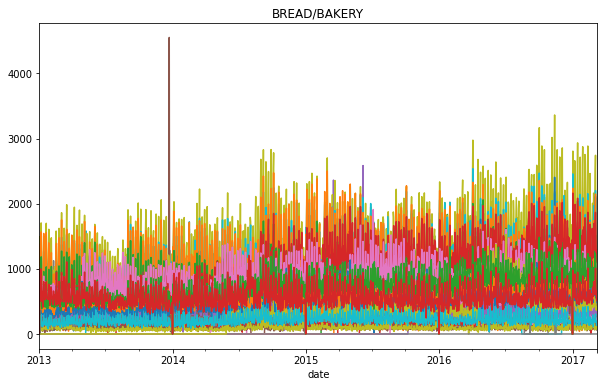

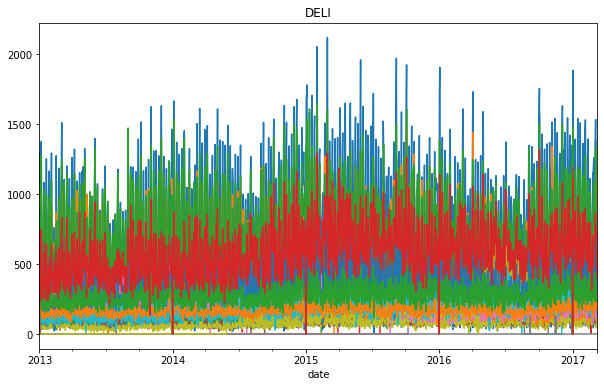

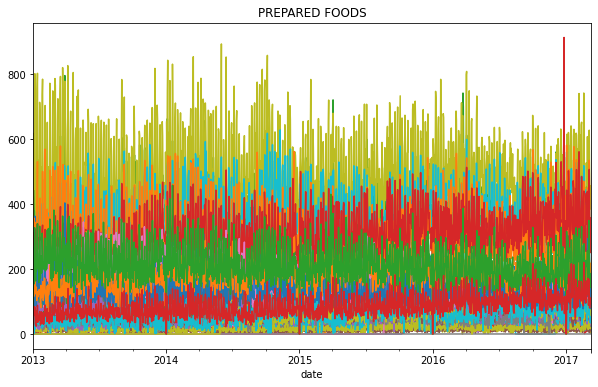

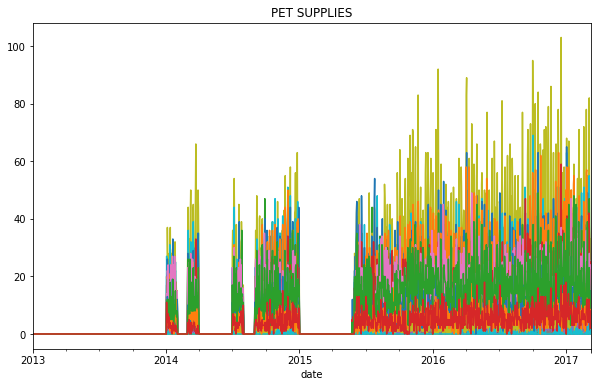

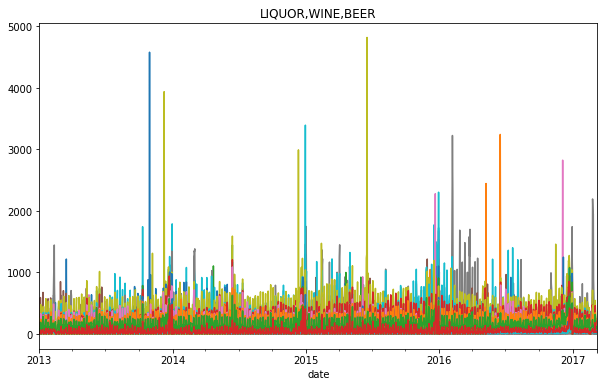

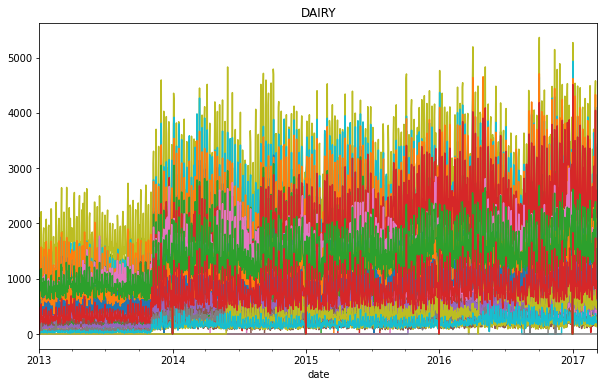

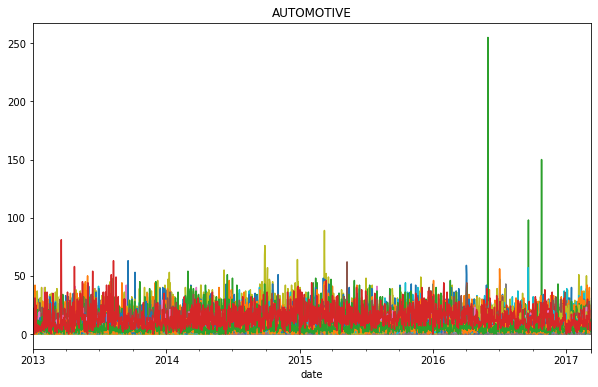

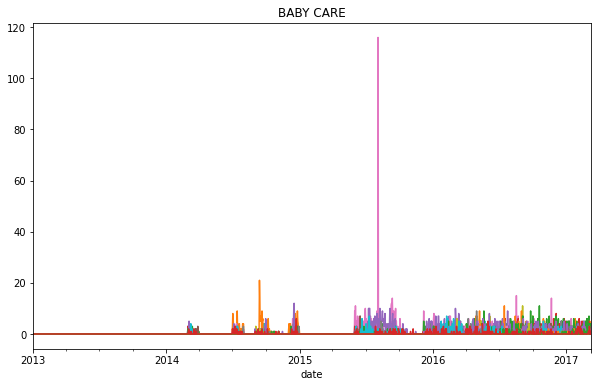

In [ ]:
y = train.unstack(['store_nbr', 'family']).loc['2013':'2017']
family = {c[2] for c in train.index}
for f in family:
    ax = y.loc(axis =1)['sales', :, f].plot(legend = None)
    ax.set_title(f)